In [1]:
import xarray as xr
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import time
import os
import gc
import dask
from pathlib import Path
import intake

import warnings
warnings.filterwarnings("ignore")

In [2]:
from matplotlib import rcParams
import seaborn as sns

###### Set the font of figures
sns.set(font='serif')
sns.set_style('ticks')
rcParams['axes.titleweight'] = 'bold'
rcParams['axes.titlecolor'] = 'black'
rcParams['font.family'] = 'serif'

clivi: cloud ice path
clt: total cloud cover
clwvi: cloud condensed water path
hflsd: latent heat flux
hfssd: sensible heat flux
huss: specific humidity in 2m
mrso: Water content of soil layers
o3vi: ozone path
orog: surface altitude
pr: precipitation flux
prs: large-scale precipitation flux (snow)
prw: water vapor path
ps: surface pressure
psl: mean sea level pressure
rlds: surface downwelling longwave radiation
rldscs: surface downwelling clear-sky longwave radiation
rlus: surface upwelling longwave radiation
rlut: toa outgoing longwave radiation
rlutcs: toa outgoing clear-sky longwave radiation
rsds: surface downwelling shortwave radiation
rsdscs: surface downwelling clear-sky shortwave radiation
rsdt: toa incident shortwave radiation
rsus: surface upwelling shortwave radiation
rsuscs: surface upwelling clear-sky shortwave radiation
rsut: toa outgoing shortwave radiation
rsutcs: toa outgoing clear-sky shortwave radiation
sftgif: cell area fraction occupied by land ice
sftlf: cell ar

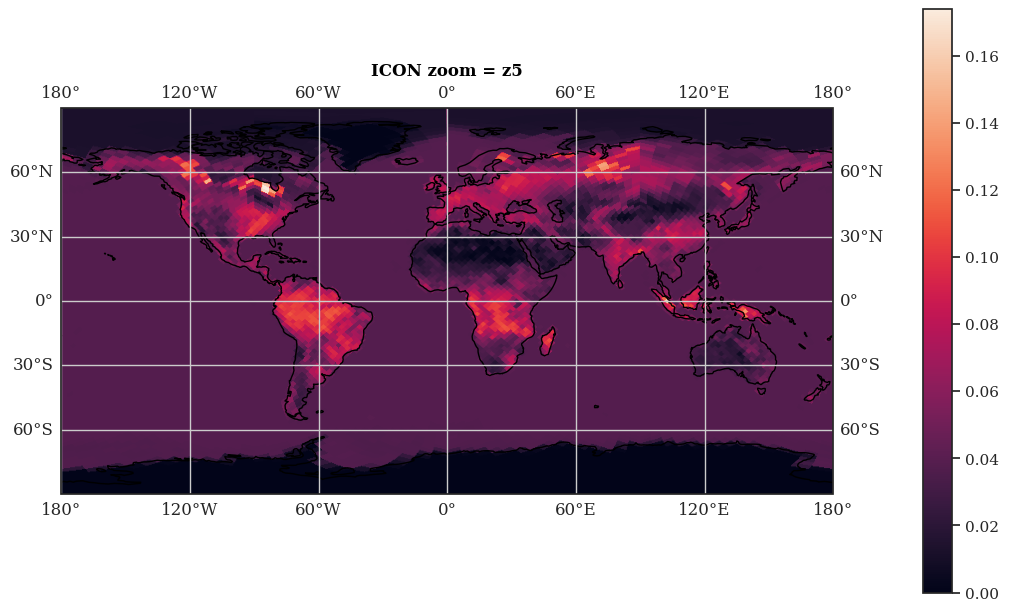

In [3]:
'''
#### these modules are required to run the script
module use /g/data/hh5/public/modules
module load conda/analysis3
source /scratch/nf33/public/hackathon_env/bin/activate
'''

import easygems.healpix as egh
import cartopy.crs as ccrs

# define paths
datapath = '/g/data/qx55/germany_node/d3hp003.zarr'
file = 'PT3H'
zoom = 'z5'

# define the fname
fpath = f'{datapath}/{file}_mean_{zoom}_atm.zarr'

# open the zarr file
ds = xr.open_zarr(fpath)

# what variables are there in the dataset?
for key, longname in ds.data_vars.items():
    print(f'{key}: {longname.long_name}')

'''
#### some variables of interest ####

hflsd: latent heat flux
hfssd: sensible heat flux
huss: specific humidity in 2m
mrso: Water content of soil layers
orog: surface altitude
pr: precipitation flux
rlds: surface downwelling longwave radiation
rldscs: surface downwelling clear-sky longwave radiation
rlus: surface upwelling longwave radiation
rsds: surface downwelling shortwave radiation
rsdscs: surface downwelling clear-sky shortwave radiation
rsus: surface upwelling shortwave radiation
sftlf: cell area fraction occupied by land including lakes
tas: temperature in 2m
tauu: u-momentum flux at the surface
tauv: v-momentum flux at the surface
ts: surface temperature
uas: zonal wind in 10m
vas: meridional wind in 10m
'''

# choose a variable to plot
da = ds['mrso']

# test plot some data
plt.close('all')
projection=ccrs.PlateCarree(central_longitude=0.0)
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': projection}, layout='constrained')

data = da.isel(time=20, soil_level=1)
ax.set_global()
# im = egh.healpix_show(data.values,ax=ax)
im = egh.healpix_show(data, ax=ax)
ax.set_title(f'ICON zoom = {zoom}')
ax.coastlines()
ax.gridlines(draw_labels=True)
fig.colorbar(im,orientation='vertical')

plt.show()



## Regenerating the results of Paper.

In [4]:
# define paths
datapath = '/scratch/nf33/Healpix_data/'
model = 'UM'
zoom = 'z2'
fpath = f'{datapath}{model}/data.healpix.PT1H.{zoom}.zarr'

# open the zarr file
ds = xr.open_zarr(fpath)

# what variables are there in the dataset?
for key, longname in ds.data_vars.items():
    print(f'{key}: {longname.long_name}')

clivi: atmosphere_mass_content_of_cloud_ice
clt: cloud_area_fraction
clwvi: atmosphere_mass_content_of_cloud_condensed_water
hflsd: surface_downward_latent_heat_flux
hfssd: surface_downward_sensible_heat_flux
huss: specific_humidity
pr: precipitation_flux
prs: solid_precipitation_flux
prw: atmosphere_mass_content_of_water_vapor
ps: surface_air_pressure
psl: air_pressure_at_mean_sea_level
rlds: surface_downwelling_longwave_flux_in_air
rldscs: surface_downwelling_longwave_flux_in_air_clear_sky
rlut: toa_outgoing_longwave_flux
rlutcs: toa_outgoing_longwave_flux_clear_sky
rsds: surface_downwelling_shortwave_flux_in_air
rsdscs: surface_downwelling_shortwave_flux_in_air_clear_sky
rsdt: toa_incoming_shortwave_flux
rsut: toa_outgoing_shortwave_flux
rsutcs: toa_outgoing_shortwave_flux_clear_sky
tas: air_temperature
ts: surface_temperature
uas: eastward_wind
vas: northward_wind


In [9]:
# define paths
datapath = '/scratch/nf33/Healpix_data/'
model = 'ICON'
zoom = 'z1'
fpath = f'{datapath}{model}/PT1H_inst_{zoom}_atm.zarr'

# open the zarr file
ds = xr.open_zarr(fpath)

# what variables are there in the dataset?
for key, longname in ds.data_vars.items():
    print(f'{key}: {longname.long_name}')

orog: surface altitude
pr: precipitation flux
psl: mean sea level pressure
rlut: toa outgoing longwave radiation
rsut: toa outgoing shortwave radiation
sftgif: cell area fraction occupied by land ice
sftlf: cell area fraction occupied by land including lakes
ts: surface temperature
uas: zonal wind in 10m
vas: meridional wind in 10m


In [10]:
# read UM z2
ds_2 = xr.open_zarr(fpath)
ds_2

<xarray.Dataset> Size: 14MB
Dimensions:  (crs: 1, cell: 48, time: 10200)
Coordinates:
  * crs      (crs) float32 4B nan
  * time     (time) datetime64[ns] 82kB 2020-01-01T01:00:00 ... 2021-03-01
Dimensions without coordinates: cell
Data variables:
    orog     (cell) float32 192B dask.array<chunksize=(48,), meta=np.ndarray>
    pr       (time, cell) float32 2MB dask.array<chunksize=(4, 48), meta=np.ndarray>
    psl      (time, cell) float32 2MB dask.array<chunksize=(4, 48), meta=np.ndarray>
    rlut     (time, cell) float32 2MB dask.array<chunksize=(4, 48), meta=np.ndarray>
    rsut     (time, cell) float32 2MB dask.array<chunksize=(4, 48), meta=np.ndarray>
    sftgif   (cell) float32 192B dask.array<chunksize=(48,), meta=np.ndarray>
    sftlf    (cell) float32 192B dask.array<chunksize=(48,), meta=np.ndarray>
    ts       (time, cell) float32 2MB dask.array<chunksize=(4, 48), meta=np.ndarray>
    uas      (time, cell) float32 2MB dask.array<chunksize=(4, 48), meta=np.ndarray>
    vas      (time, cell) float32 2MB dask.array<chunksize=(4, 48), meta=np.ndarray>
Attributes:
    hiopy::parent:  PT1H_point_z2_atm

In [23]:
data = ds_2.pr.isel(time=20)

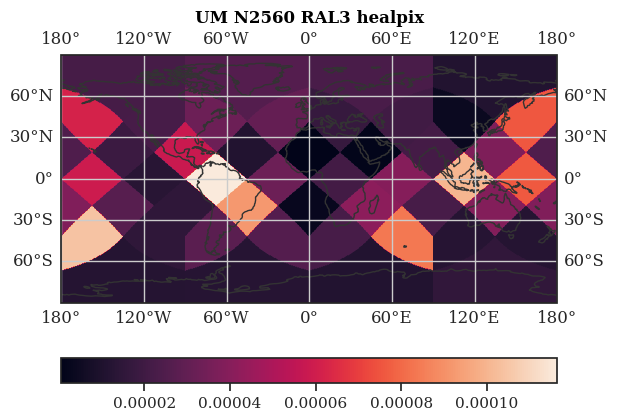

In [27]:
# Plotting lat/lon values over the grid
projection=ccrs.PlateCarree(central_longitude=0.0)

ax = egh.create_geoaxis(add_coastlines=True,projection=projection)
im = egh.healpix_show(data, ax=ax, add_coastlines=True)
ax.set_title(f'UM N2560 RAL3 healpix')
ax.gridlines(draw_labels=True)
fig=ax.get_figure()
fig.colorbar(im,orientation='horizontal')

In [10]:
datapath = '/g/data/qx55/germany_node/d3hp003.zarr'
file = 'P1D'
zoom = 'z10'

# define the fname
fpath = f'{datapath}/{file}_mean_{zoom}_atm.zarr'

# open the zarr file
ds = xr.open_zarr(fpath)

# what variables are there in the dataset?
for key, longname in ds.data_vars.items():
    print(f'{key}: {longname.long_name}')

clivi: cloud ice path
clt: total cloud cover
clwvi: cloud condensed water path
egpvi: Atmosphere Geopotential Energy Content
einvi: Atmosphere Moist Internal Energy Content
ekhvi: Atmosphere Horizontal Kinetic Energy Content
ekvvi: Atmosphere Vertical Kinetic Energy Content
hflsd: latent heat flux
hfssd: sensible heat flux
hur: relative humidity
hus: Specific humidity
huss: specific humidity in 2m
mrso: Water content of soil layers
o3vi: ozone path
orog: surface altitude
pr: precipitation flux
prs: large-scale precipitation flux (snow)
prw: water vapor path
ps: surface pressure
psl: mean sea level pressure
qall: mass fraction of all hydrometeors in air
rlds: surface downwelling longwave radiation
rldscs: surface downwelling clear-sky longwave radiation
rlus: surface upwelling longwave radiation
rlut: toa outgoing longwave radiation
rlutcs: toa outgoing clear-sky longwave radiation
rsds: surface downwelling shortwave radiation
rsdscs: surface downwelling clear-sky shortwave radiation
rs

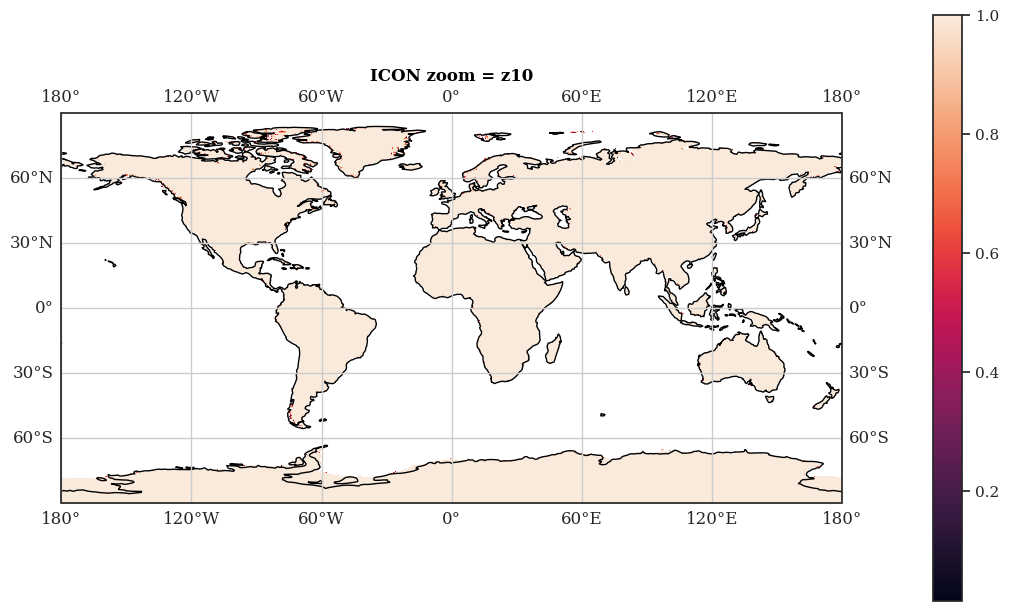

In [30]:
# choose a variable to plot
da = ds['sftlf']

# test plot some data
plt.close('all')
projection=ccrs.PlateCarree(central_longitude=0.0)
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': projection}, layout='constrained')

data = da
ax.set_global()
im = egh.healpix_show(data, ax=ax, add_coastlines=True)
ax.set_title(f'ICON zoom = {zoom}')
ax.coastlines()
ax.gridlines(draw_labels=True)
fig.colorbar(im,orientation='vertical')

plt.show()

In [8]:
#calculate evapotranspiration 
evapo = ds['hflsd']/(2.501*1000000)


In [11]:
icon_pr = ds['pr'].mean('time')* 86400 ## change the unit

In [ ]:
icon_smi = xr.where( (icon_pr>=.1)&(ds['sftlf']>0.9), ds['mrso'], np.NaN)
icon_y1  = xr.where( (icon_pr>=.1)&(ds['sftlf']>0.9), ds['hflsd'], np.NaN)
icon_y2  = xr.where( (icon_pr>=.1)&(ds['sftlf']>0.9), ds['hfssd'], np.NaN)

icon_corr_lh_pr = xr.where((icon_pr>=.1)&( ds['sftlf'] >0.9), 
                                xr.corr(ds['pr'], icon_y1, dim='time'), np.NaN) #.values
icon_corr_sh_pr = xr.where((icon_pr>=.1)&( ds['sftlf'] >0.9), 
                                xr.corr(ds['pr'], icon_y2, dim='time'), np.NaN) #.values

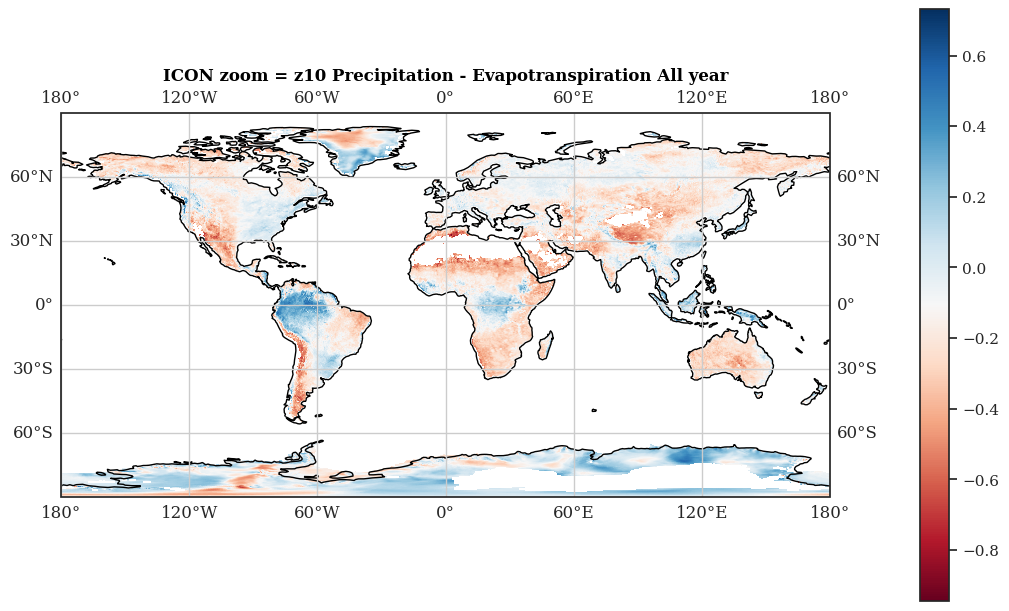

In [43]:
plt.close('all')
projection=ccrs.PlateCarree(central_longitude=0.0)
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': projection}, layout='constrained')

#data = da.isel(time=20, soil_level=1)

ax.set_global()
im = egh.healpix_show(icon_corr_lh_pr,ax=ax,cmap='RdBu')
ax.set_title(f'ICON zoom = {zoom} Precipitation - Evapotranspiration All year')
ax.coastlines()
ax.gridlines(draw_labels=True)
fig.colorbar(im,orientation='vertical')

plt.show()

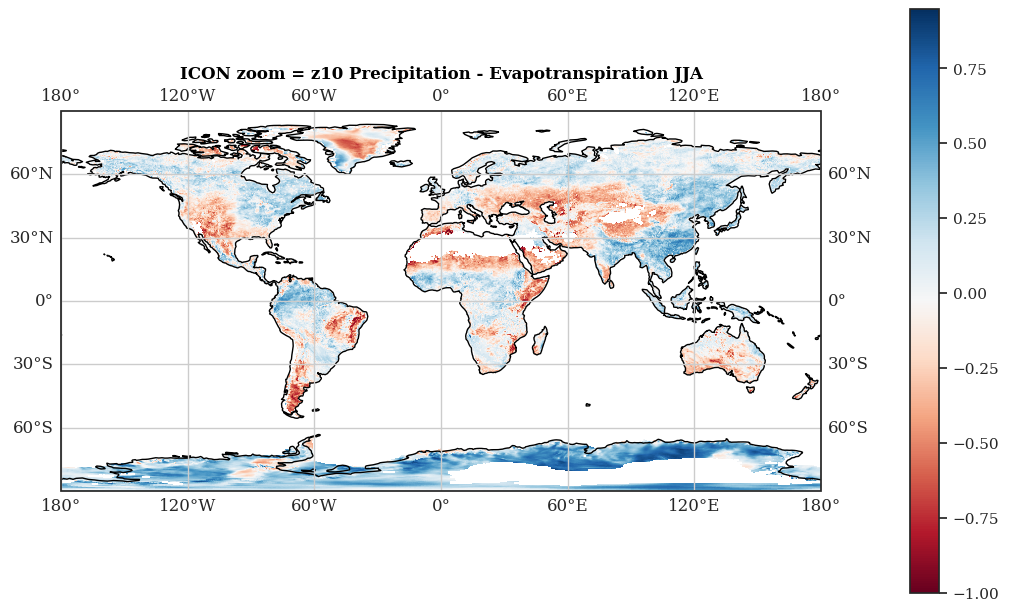

In [45]:
ds_jja = ds.sel(time=ds['time'].dt.month.isin([6, 7, 8]))


icon_smi = xr.where( (icon_pr>=.1)&(ds['sftlf']>0.9), ds_jja['mrso'].isel(soil_level=0), np.NaN)
icon_y1  = xr.where( (icon_pr>=.1)&(ds['sftlf']>0.9), ds_jja['hflsd'], np.NaN)
icon_y2  = xr.where( (icon_pr>=.1)&(ds['sftlf']>0.9), ds_jja['hfssd'], np.NaN)

icon_corr_lh_pr      = xr.where((icon_pr>=.1)&( ds['sftlf'] >0.9), 
                                xr.corr(ds_jja['pr'], icon_y1, dim='time'), np.NaN) #.values
icon_corr_sh_pr      = xr.where((icon_pr>=.1)&( ds['sftlf'] >0.9), 
                                xr.corr(ds_jja['pr'], icon_y2, dim='time'), np.NaN) #.values
icon_corr_sm_pr      = xr.where((icon_pr>=.1)&( ds['sftlf'] >0.9), 
                                xr.corr(ds_jja['pr'], icon_smi, dim='time'), np.NaN) #.values


plt.close('all')
projection=ccrs.PlateCarree(central_longitude=0.0)
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': projection}, layout='constrained')

#data = da.isel(time=20, soil_level=1)

ax.set_global()
im = egh.healpix_show(icon_corr_lh_pr,ax=ax,cmap='RdBu')
ax.set_title(f'ICON zoom = {zoom} Precipitation - Evapotranspiration JJA')
ax.coastlines()
ax.gridlines(draw_labels=True)
fig.colorbar(im,orientation='vertical')

plt.show()

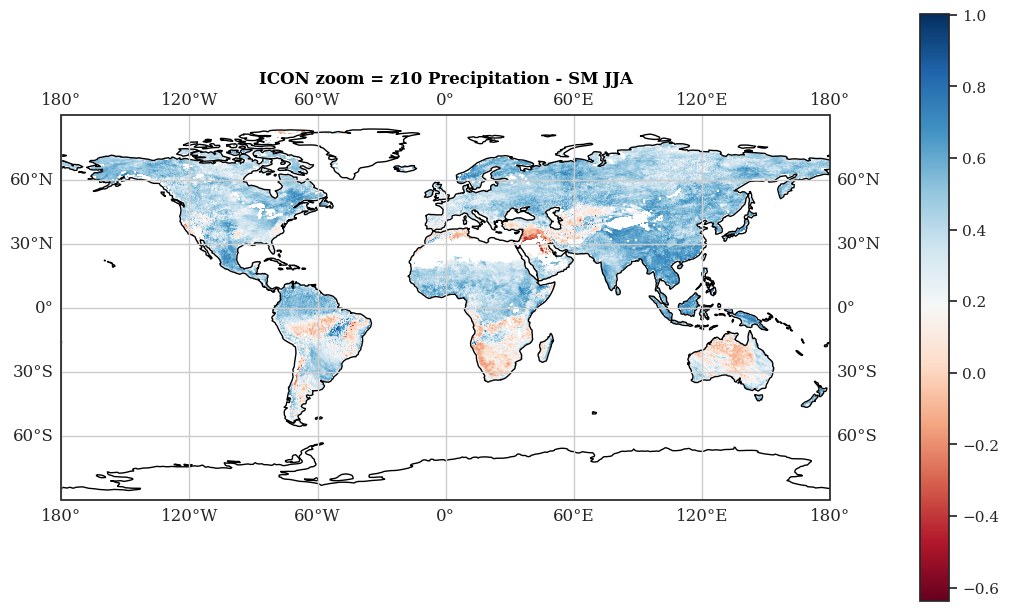

In [46]:
plt.close('all')
projection=ccrs.PlateCarree(central_longitude=0.0)
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': projection}, layout='constrained')

#data = da.isel(time=20, soil_level=1)

ax.set_global()
im = egh.healpix_show(icon_corr_sm_pr ,ax=ax,cmap='RdBu')
ax.set_title(f'ICON zoom = {zoom} Precipitation - SM JJA')
ax.coastlines()
ax.gridlines(draw_labels=True)
fig.colorbar(im,orientation='vertical')

plt.show()

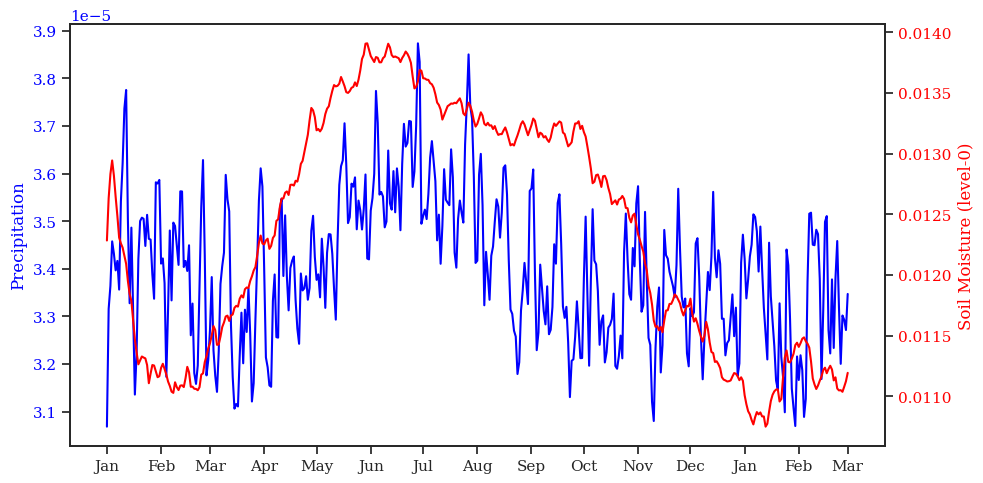

In [47]:
import matplotlib.dates as mdates

ts1 = ds.pr.mean('cell')

icon_smi = xr.where( (icon_pr>=.1)&(ds['sftlf']>0.9), ds['mrso'].isel(soil_level=0), np.NaN)
ts2 = icon_smi.mean('cell')
dates = ds.time

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(ts1, color='blue', label='Precipitation')
ax1.set_ylabel('Precipitation', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(ts2, color='red', label='Soil Moisture (level-0)')
ax2.set_ylabel('Soil Moisture (level-0)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.title('')
fig.tight_layout()
plt.show()


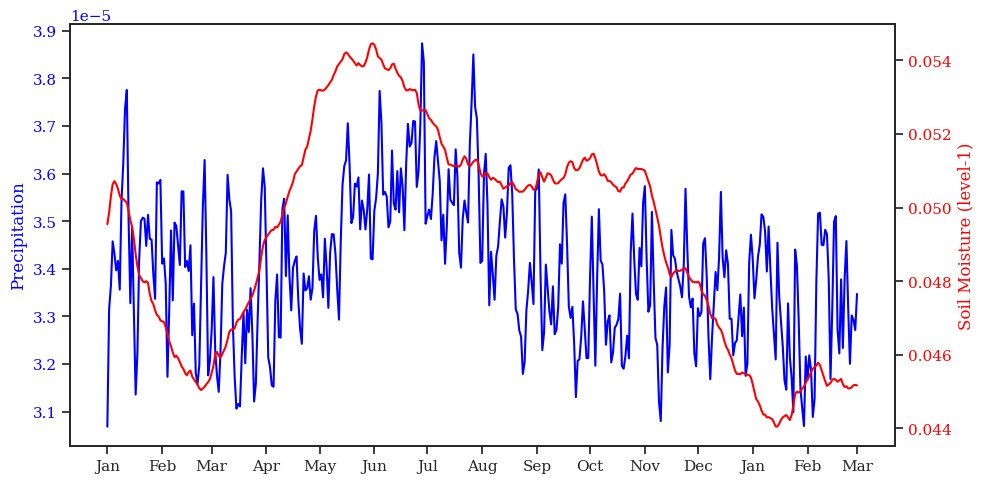

In [48]:
ts1 = ds.pr.mean('cell')

icon_smi = xr.where( (icon_pr>=.1)&(ds['sftlf']>0.9), ds['mrso'].isel(soil_level=1), np.NaN)
ts2 = icon_smi.mean('cell')
dates = ds.time

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(ts1, color='blue', label='Precipitation')
ax1.set_ylabel('Precipitation', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(ts2, color='red', label='Soil Moisture (level-1)')
ax2.set_ylabel('Soil Moisture (level-1)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.title('')
fig.tight_layout()
plt.show()


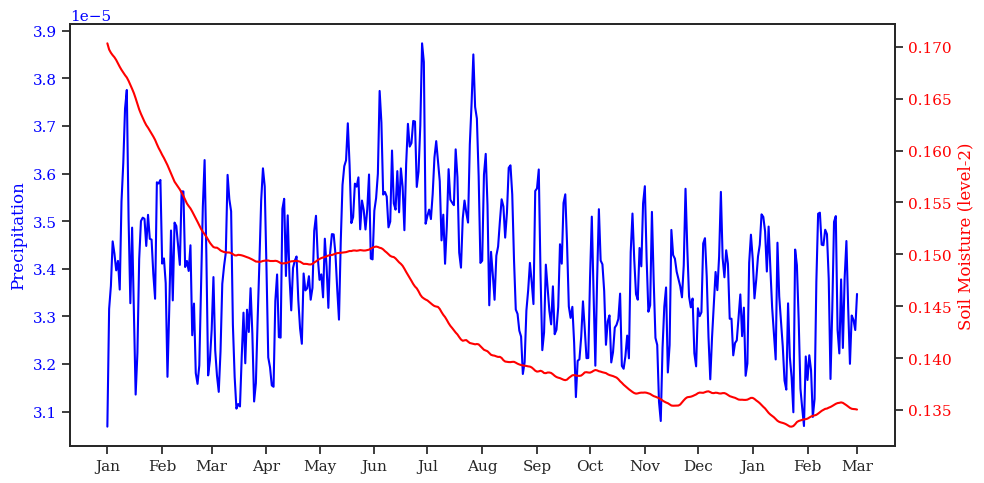

In [50]:
ts1 = ds.pr.mean('cell')

icon_smi = xr.where( (icon_pr>=.1)&(ds['sftlf']>0.9), ds['mrso'].isel(soil_level=2), np.NaN)
ts2 = icon_smi.mean('cell')
dates = ds.time

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(ts1, color='blue', label='Precipitation')
ax1.set_ylabel('Precipitation', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(ts2, color='red', label='Soil Moisture (level-2)')
ax2.set_ylabel('Soil Moisture (level-2)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

    
plt.title('')
fig.tight_layout()
plt.show()


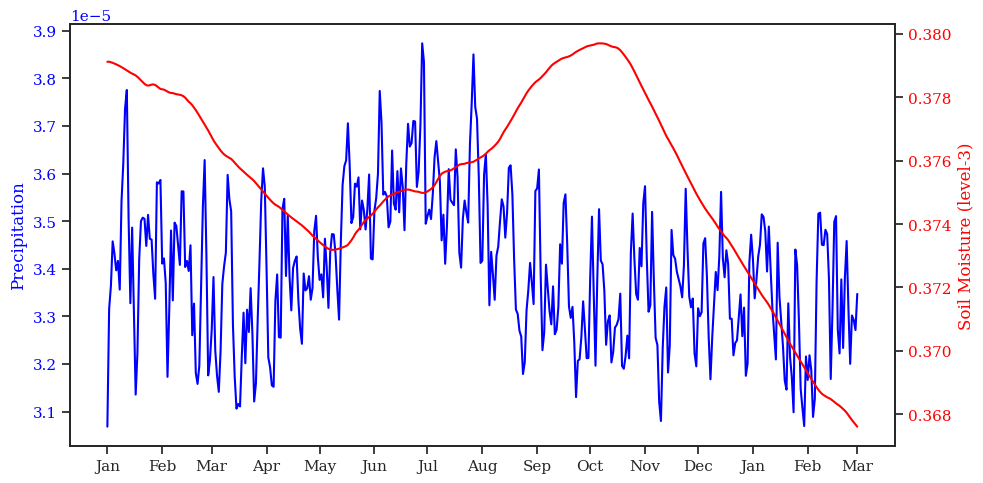

In [51]:
ts1 = ds.pr.mean('cell')

icon_smi = xr.where( (icon_pr>=.1)&(ds['sftlf']>0.9), ds['mrso'].isel(soil_level=3), np.NaN)
ts2 = icon_smi.mean('cell')
dates = ds.time

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(ts1, color='blue', label='Precipitation')
ax1.set_ylabel('Precipitation', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(ts2, color='red', label='Soil Moisture (level-3)')
ax2.set_ylabel('Soil Moisture (level-3)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.title('')
fig.tight_layout()
plt.show()


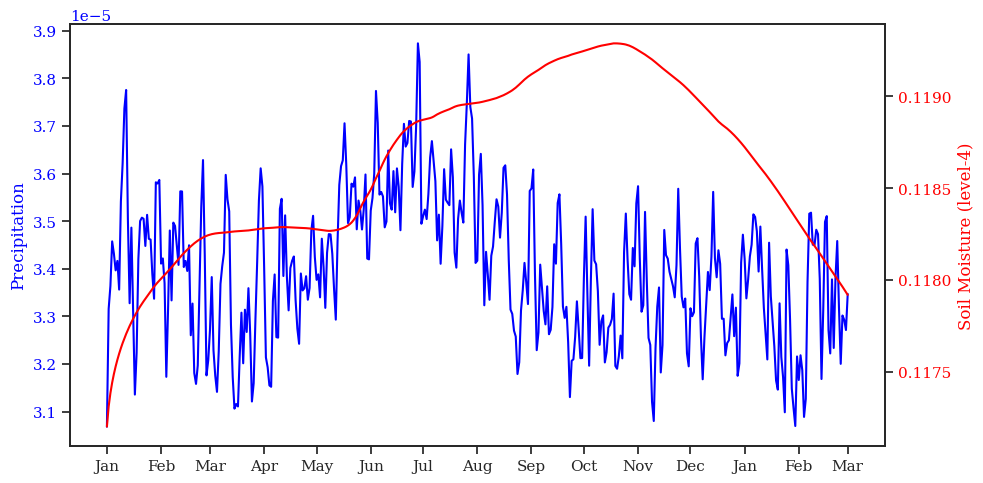

In [52]:
ts1 = ds.pr.mean('cell')

icon_smi = xr.where( (icon_pr>=.1)&(ds['sftlf']>0.9), ds['mrso'].isel(soil_level=4), np.NaN)
ts2 = icon_smi.mean('cell')
dates = ds.time

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(ts1, color='blue', label='Precipitation')
ax1.set_ylabel('Precipitation', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(ts2, color='red', label='Soil Moisture (level-4)')
ax2.set_ylabel('Soil Moisture (level-4)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.title('')
fig.tight_layout()
plt.show()


In [ ]:
ts1 = ds.pr.mean('cell')

icon_smi = xr.where( (icon_pr>=.1)&(ds['sftlf']>0.9), ds['mrso'].isel(soil_level=5), np.NaN)
ts2 = icon_smi.mean('cell')
dates = ds.time

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(ts1, color='blue', label='Precipitation')
ax1.set_ylabel('Precipitation', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(ts2, color='red', label='Soil Moisture (level-5)')
ax2.set_ylabel('Soil Moisture (level-5)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.title('')
fig.tight_layout()
plt.show()


## The scatter plot of Preicipation and Soil Moisture.

In [ ]:
icon_smi = xr.where( (icon_pr>=.1)&(ds['sftlf']>0.9), ds['mrso'].isel(soil_level=0), np.NaN)
pr = ds.pr.mean('cell')

icon_y1  = xr.where( (icon_pr>=.1)&(ds['sftlf']>0.9), ds['hflsd'], np.NaN)
# evapo = icon_y1/(2.501*1000000)

plt.figure(figsize=(8, 5))
plt.scatter(icon_y1, pr, alpha=0.3, color='blue', label='Daily Values')
plt.xlabel('Temperature [°C]')
plt.ylabel('Precipitation [mm/day]')
plt.title('Precipitation vs. Temperature')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
